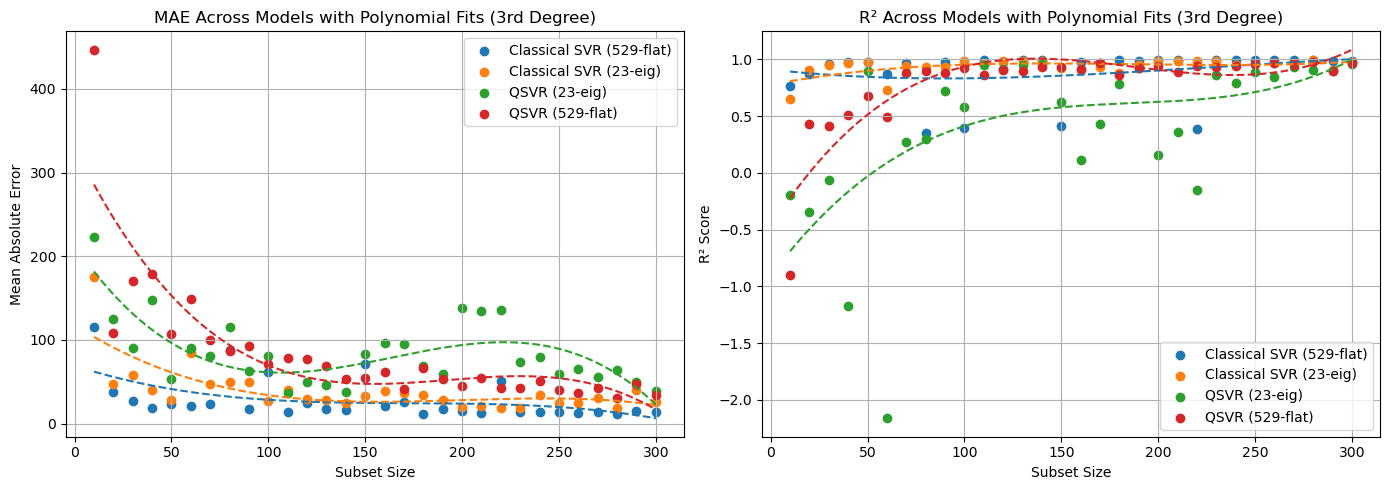

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1) Define your subset sizes and empty metric lists ---
subset_sizes = list(range(10, 301, 10))  # [10, 20, …, 300]

# Classical SVR
mae_classical_flat = [115.694, 37.621, 27.054, 18.648, 23.058, 21.071, 23.095, 87.655, 17.951, 61.73, 13.513, 25.17, 17.37, 16.871, 71.316, 21.088, 26.081, 11.692, 17.794, 14.773, 12.702, 51.029, 14.119, 14.165, 14.098, 12.903, 13.955, 12.083, 14.851, 13.456]  # fill with MAE for Classical SVR (529-flat)
r2_classical_flat  = [0.768, 0.869, 0.955, 0.975, 0.977, 0.867, 0.968, 0.351, 0.976, 0.393, 0.993, 0.98, 0.99, 0.991, 0.416, 0.978, 0.969, 0.995, 0.989, 0.991, 0.995, 0.39, 0.992, 0.991, 0.994, 0.994, 0.994, 0.996, 0.989, 0.989]  # fill with R²  for Classical SVR (529-flat)

mae_classical_eig  = [175.604, 47.016, 57.643, 39.652, 28.447, 84.935, 47.23, 49.803, 49.204, 26.481, 40.404, 29.031, 28.762, 24.639, 33.275, 38.667, 36.7, 34.143, 28.522, 20.031, 21.552, 18.515, 18.259, 33.932, 25.003, 24.994, 30.326, 19.121, 40.035, 25.619]  # fill with MAE for Classical SVR (23-eig)
r2_classical_eig   = [0.648, 0.904, 0.953, 0.969, 0.978, 0.732, 0.945, 0.935, 0.93, 0.988, 0.96, 0.986, 0.981, 0.984, 0.919, 0.904, 0.928, 0.882, 0.947, 0.984, 0.981, 0.986, 0.989, 0.952, 0.962, 0.97, 0.965, 0.99, 0.902, 0.975]   # fill with R²  for Classical SVR (23-eig)

# Quantum SVR
mae_qsvr_eig       = [223.398, 124.569, 90.261, 147.967, 53.864, 90.725, 80.283, 115.792, 63.074, 80.373, 36.521, 49.274, 46.707, 38.31, 82.841, 96.391, 95.455, 68.726, 59.81, 138.266, 134.528, 135.583, 74.096, 79.116, 58.897, 65.562, 56.316, 64.383, 50.138, 38.836]   # fill with MAE for QSVR (23-eig)
r2_qsvr_eig        = [-0.191, -0.345, -0.061, -1.17, 0.901, -2.162, 0.273, 0.294, 0.723, 0.579, 0.949, 0.918, 0.946, 0.955, 0.624, 0.115, 0.432, 0.783, 0.924, 0.154, 0.36, -0.147, 0.86, 0.795, 0.885, 0.842, 0.931, 0.905, 0.9, 0.958]   # fill with R²  for QSVR (23-eig)

mae_qsvr_flat      = [446.827, 108.862, 170.993, 178.782, 106.702, 149.32, 99.973, 86.449, 93.092, 71.454, 78.676, 77.768, 68.814, 53.212, 54.75, 61.477, 41.104, 65.957, 53.071, 44.908, 54.893, 42.672, 42.771, 50.601, 40.079, 36.526, 42.666, 30.79, 47.79, 33.734]  # fill with MAE for QSVR (529-flat)
r2_qsvr_flat       = [-0.904, 0.43, 0.415, 0.507, 0.681, 0.496, 0.878, 0.9, 0.876, 0.922, 0.858, 0.904, 0.897, 0.932, 0.933, 0.915, 0.966, 0.864, 0.922, 0.94, 0.89, 0.941, 0.936, 0.942, 0.959, 0.97, 0.964, 0.975, 0.901, 0.971]
   # fill with R²  for QSVR (529-flat)


x   = np.array(subset_sizes)

y_mae = {
    'CF': np.array(mae_classical_flat),
    'CE': np.array(mae_classical_eig),
    'QE': np.array(mae_qsvr_eig),
    'QF': np.array(mae_qsvr_flat),
}
y_r2 = {
    'CF': np.array(r2_classical_flat),
    'CE': np.array(r2_classical_eig),
    'QE': np.array(r2_qsvr_eig),
    'QF': np.array(r2_qsvr_flat),
}

labels = {
    'CF': 'Classical SVR (529-flat)',
    'CE': 'Classical SVR (23-eig)',
    'QE': 'QSVR (23-eig)',
    'QF': 'QSVR (529-flat)'
}

# --- 4) Prepare smooth x values and polynomial degree for fitting ---
x_smooth = np.linspace(x.min(), x.max(), 500)
degree = 3  # change if you want a different polynomial degree

# --- 5) Plot raw data + fitted curves ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MAE subplot
for key, y in y_mae.items():
    ax1.scatter(x, y, label=labels[key])            # raw data
    coeffs = np.polyfit(x, y, deg=degree)           # fit
    poly   = np.poly1d(coeffs)
    ax1.plot(x_smooth, poly(x_smooth), '--')        # fitted curve

ax1.set_xlabel('Subset Size')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('MAE Across Models with Polynomial Fits (3rd Degree)')
ax1.legend()
ax1.grid(True)

# R² subplot
for key, y in y_r2.items():
    ax2.scatter(x, y, label=labels[key])
    coeffs = np.polyfit(x, y, deg=degree)
    poly   = np.poly1d(coeffs)
    ax2.plot(x_smooth, poly(x_smooth), '--')

ax2.set_xlabel('Subset Size')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Across Models with Polynomial Fits (3rd Degree)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


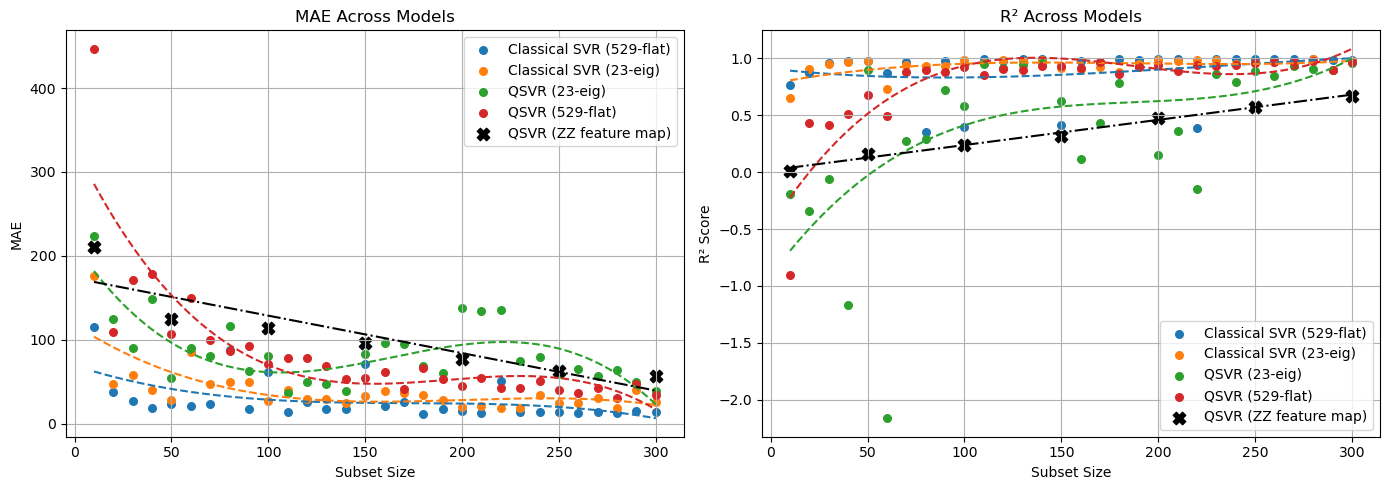

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Data
subset_sizes      = list(range(10, 301, 10))
subset_sizes_zz   = [10, 50, 100, 150, 200, 250, 300]

mae_classical_flat = [115.694, 37.621, 27.054, 18.648, 23.058, 21.071, 23.095, 87.655,
                      17.951, 61.73, 13.513, 25.17, 17.37, 16.871, 71.316, 21.088,
                      26.081, 11.692, 17.794, 14.773, 12.702, 51.029, 14.119, 14.165,
                      14.098, 12.903, 13.955, 12.083, 14.851, 13.456]
r2_classical_flat  = [0.768, 0.869, 0.955, 0.975, 0.977, 0.867, 0.968, 0.351,
                      0.976, 0.393, 0.993, 0.98, 0.99, 0.991, 0.416, 0.978,
                      0.969, 0.995, 0.989, 0.991, 0.995, 0.39, 0.992, 0.991,
                      0.994, 0.994, 0.994, 0.996, 0.989, 0.989]

mae_classical_eig  = [175.604, 47.016, 57.643, 39.652, 28.447, 84.935, 47.23, 49.803,
                      49.204, 26.481, 40.404, 29.031, 28.762, 24.639, 33.275, 38.667,
                      36.7, 34.143, 28.522, 20.031, 21.552, 18.515, 18.259, 33.932,
                      25.003, 24.994, 30.326, 19.121, 40.035, 25.619]
r2_classical_eig   = [0.648, 0.904, 0.953, 0.969, 0.978, 0.732, 0.945, 0.935,
                      0.93, 0.988, 0.96, 0.986, 0.981, 0.984, 0.919, 0.904,
                      0.928, 0.882, 0.947, 0.984, 0.981, 0.986, 0.989, 0.952,
                      0.962, 0.97, 0.965, 0.99, 0.902, 0.975]

mae_qsvr_eig       = [223.398, 124.569, 90.261, 147.967, 53.864, 90.725, 80.283, 115.792,
                      63.074, 80.373, 36.521, 49.274, 46.707, 38.31, 82.841, 96.391,
                      95.455, 68.726, 59.81, 138.266, 134.528, 135.583, 74.096, 79.116,
                      58.897, 65.562, 56.316, 64.383, 50.138, 38.836]
r2_qsvr_eig        = [-0.191, -0.345, -0.061, -1.17, 0.901, -2.162, 0.273, 0.294,
                      0.723, 0.579, 0.949, 0.918, 0.946, 0.955, 0.624, 0.115,
                      0.432, 0.783, 0.924, 0.154, 0.36, -0.147, 0.86, 0.795,
                      0.885, 0.842, 0.931, 0.905, 0.9, 0.958]

mae_qsvr_flat      = [446.827, 108.862, 170.993, 178.782, 106.702, 149.32, 99.973, 86.449,
                      93.092, 71.454, 78.676, 77.768, 68.814, 53.212, 54.75, 61.477,
                      41.104, 65.957, 53.071, 44.908, 54.893, 42.672, 42.771, 50.601,
                      40.079, 36.526, 42.666, 30.79, 47.79, 33.734]
r2_qsvr_flat       = [-0.904, 0.43, 0.415, 0.507, 0.681, 0.496, 0.878, 0.9,
                      0.876, 0.922, 0.858, 0.904, 0.897, 0.932, 0.933, 0.915,
                      0.966, 0.864, 0.922, 0.94, 0.89, 0.941, 0.936, 0.942,
                      0.959, 0.97, 0.964, 0.975, 0.901, 0.971]

mae_zz             = [210, 124.43, 113.443, 96.34, 76.543, 62.389, 56.94]
r2_zz              = [0.012, 0.164, 0.243, 0.321, 0.476, 0.577, 0.672]

# 2) Arrays
x    = np.array(subset_sizes)
x_zz = np.array(subset_sizes_zz)

y_mae = {
    'CF': np.array(mae_classical_flat),
    'CE': np.array(mae_classical_eig),
    'QE': np.array(mae_qsvr_eig),
    'QF': np.array(mae_qsvr_flat),
}

y_r2 = {
    'CF': np.array(r2_classical_flat),
    'CE': np.array(r2_classical_eig),
    'QE': np.array(r2_qsvr_eig),
    'QF': np.array(r2_qsvr_flat),
}

labels = {
    'CF': 'Classical SVR (529-flat)',
    'CE': 'Classical SVR (23-eig)',
    'QE': 'QSVR (23-eig)',
    'QF': 'QSVR (529-flat)',
    'ZZ': 'QSVR (ZZ feature map)'
}

# 3) Fit settings
x_smooth = np.linspace(x.min(), x.max(), 500)
deg_poly = 3

# 4) Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MAE
for key, y in y_mae.items():
    ax1.scatter(x, y, label=labels[key], s=30)
    fit = np.poly1d(np.polyfit(x, y, deg=deg_poly))
    ax1.plot(x_smooth, fit(x_smooth), '--')

ax1.scatter(x_zz, mae_zz, marker='X', c='k', label=labels['ZZ'], s=80)
fit_zz = np.poly1d(np.polyfit(x_zz, mae_zz, 1))
ax1.plot(x_zz, fit_zz(x_zz), '-.', color='k')

ax1.set(xlabel='Subset Size', ylabel='MAE', title='MAE Across Models')
ax1.legend(); ax1.grid()

# R²
for key, y in y_r2.items():
    ax2.scatter(x, y, label=labels[key], s=30)
    fit = np.poly1d(np.polyfit(x, y, deg=deg_poly))
    ax2.plot(x_smooth, fit(x_smooth), '--')

ax2.scatter(x_zz, r2_zz, marker='X', c='k', label=labels['ZZ'], s=80)
fit_zz_r2 = np.poly1d(np.polyfit(x_zz, r2_zz, 1))
ax2.plot(x_zz, fit_zz_r2(x_zz), '-.', color='k')

ax2.set(xlabel='Subset Size', ylabel='R² Score', title='R² Across Models')
ax2.legend(); ax2.grid()

plt.tight_layout()
plt.show()


[1/9] loading QM7 …
    7165 molecules loaded

[2/9] building flat and eigen features …
    features ready

[3/9] scaling features/targets …
    scaling done

[4/9] train/test split …
    split complete

[5/9] training classical SVR on 529-D …
[5/9] training classical SVR on 23-eig …
    classical baselines done

[6/9] building 10-qubit train state-vectors …
        0/5732
        500/5732
        1000/5732
        1500/5732
        2000/5732
        2500/5732
        3000/5732
        3500/5732
        4000/5732
        4500/5732
        5000/5732
        5500/5732
        computing 10-qubit train kernel …
        training 10-qubit SVR …
[6/9] building 10-qubit test state-vectors …
        0/1433
        500/1433
        1000/1433
        computing 10-qubit test kernel …
    10-qubit QSVR done

[6/9] building 5-qubit train state-vectors …
        0/5732
        500/5732
        1000/5732
        1500/5732
        2000/5732
        2500/5732
        3000/5732
        3500/5732
        

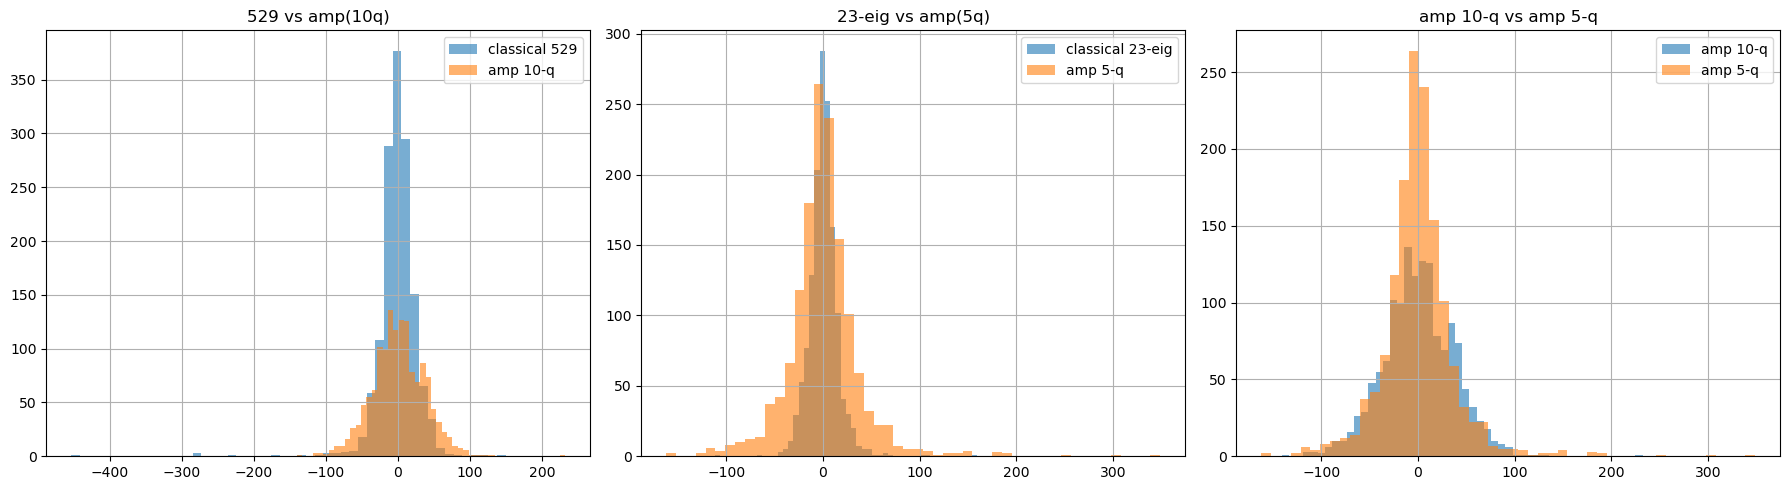

all done ✔


In [5]:
import numpy as np, scipy.io, matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


# 1) load QM7
def load_qm7(matfile="qm7.mat"):
    print("[1/9] loading QM7 …", flush=True)
    data = scipy.io.loadmat(matfile)
    C = data["X"]          # (N,23,23)
    Y = data["T"].ravel()  # (N,)
    print(f"    {C.shape[0]} molecules loaded\n", flush=True)
    return C, Y

C_all, Y_all = load_qm7("qm7.mat")
N = C_all.shape[0]


# 2) features: 529-flat + 23-eigen

print("[2/9] building flat and eigen features …", flush=True)
X_flat = C_all.reshape(N, -1)  # 529-D

X_eig = np.empty((N, 23))
for i in range(N):
    M = 0.5 * (C_all[i] + C_all[i].T)          # symmetrise
    X_eig[i] = np.sort(eigh(M, eigvals_only=True))
print("    features ready\n", flush=True)


# 3) scale
print("[3/9] scaling features/targets …", flush=True)
Xf_s = StandardScaler().fit_transform(X_flat)
Xe_s = StandardScaler().fit_transform(X_eig)

Y_mean, Y_std = Y_all.mean(), Y_all.std()
Y_s = (Y_all - Y_mean) / Y_std
print("    scaling done\n", flush=True)


# 4) split

print("[4/9] train/test split …", flush=True)
Xf_tr, Xf_te, Ys_tr, Ys_te = train_test_split(Xf_s, Y_s,
                                             test_size=0.20, random_state=42)
Xe_tr, Xe_te, _, _         = train_test_split(Xe_s, Y_s,
                                             test_size=0.20, random_state=42)
Y_test = Ys_te * Y_std + Y_mean
print("    split complete\n", flush=True)


# 5) classical SVR baselines

def run_svr(name, Xtr, Xte):
    print(f"[5/9] training classical SVR on {name} …", flush=True)
    svr = SVR(kernel="rbf", C=1e4, gamma=1e-3, epsilon=1e-2)
    svr.fit(Xtr, Ys_tr)
    pred = svr.predict(Xte) * Y_std + Y_mean
    return Y_test - pred

res_flat = run_svr("529-D",  Xf_tr, Xf_te)
res_eig  = run_svr("23-eig", Xe_tr, Xe_te)
print("    classical baselines done\n", flush=True)


# 6) quantum helpers

def build_statevectors(X, num_qubits, tag=""):
    print(f"[6/9] building {tag} state-vectors …", flush=True)
    dim = 2 ** num_qubits
    sv = np.zeros((len(X), dim), dtype=np.complex128)
    for idx, vec in enumerate(X):
        if idx % 500 == 0:
            print(f"        {idx}/{len(X)}", flush=True)
        padded = np.zeros(dim, dtype=np.complex128)
        padded[: len(vec)] = vec
        padded /= np.linalg.norm(padded)
        qc = QuantumCircuit(num_qubits)
        qc.initialize(padded, range(num_qubits))
        sv[idx] = Statevector.from_instruction(qc).data
    return sv

def kernel_matrix(A, B=None, tag=""):
    B = A if B is None else B
    print(f"        computing {tag} kernel …", flush=True)
    return np.abs(A @ B.conj().T) ** 2     # BLAS vectorised


# 7) QSVR 10-qubit on 529-flat

sv_tr10 = build_statevectors(Xf_tr, 10, tag="10-qubit train")
K_tr10  = kernel_matrix(sv_tr10, tag="10-qubit train")
print("        training 10-qubit SVR …", flush=True)
svr_q10 = SVR(kernel="precomputed", C=1e4, gamma=1e-3, epsilon=1e-2)
svr_q10.fit(K_tr10, Ys_tr)

sv_te10 = build_statevectors(Xf_te, 10, tag="10-qubit test")
K_te10  = kernel_matrix(sv_te10, sv_tr10, tag="10-qubit test")
res_q10 = Y_test - (svr_q10.predict(K_te10) * Y_std + Y_mean)
print("    10-qubit QSVR done\n", flush=True)


# 8) QSVR 5-qubit on 23-eig

sv_tr5 = build_statevectors(Xe_tr, 5, tag="5-qubit train")
K_tr5  = kernel_matrix(sv_tr5, tag="5-qubit train")
print("        training 5-qubit SVR …", flush=True)
svr_q5 = SVR(kernel="precomputed", C=1e4, gamma=1e-3, epsilon=1e-2)
svr_q5.fit(K_tr5, Ys_tr)

sv_te5 = build_statevectors(Xe_te, 5, tag="5-qubit test")
K_te5  = kernel_matrix(sv_te5, sv_tr5, tag="5-qubit test")
res_q5 = Y_test - (svr_q5.predict(K_te5) * Y_std + Y_mean)
print("    5-qubit QSVR done\n", flush=True)


# 9) plots

print("[9/9] plotting …", flush=True)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(res_flat, bins=50, alpha=0.6, label="classical 529")
ax[0].hist(res_q10, bins=50, alpha=0.6, label="amp 10-q")
ax[0].set_title("529 vs amp(10q)"); ax[0].legend(); ax[0].grid()

ax[1].hist(res_eig, bins=50, alpha=0.6, label="classical 23-eig")
ax[1].hist(res_q5,  bins=50, alpha=0.6, label="amp 5-q")
ax[1].set_title("23-eig vs amp(5q)"); ax[1].legend(); ax[1].grid()

ax[2].hist(res_q10, bins=50, alpha=0.6, label="amp 10-q")
ax[2].hist(res_q5,  bins=50, alpha=0.6, label="amp 5-q")
ax[2].set_title("amp 10-q vs amp 5-q"); ax[2].legend(); ax[2].grid()

plt.tight_layout(); plt.show()
print("all done ✔", flush=True)


In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd


# Given data
subset_sizes = np.arange(10, 301, 10)

mae_classical_flat = np.array([115.694, 37.621, 27.054, 18.648, 23.058, 21.071, 23.095, 87.655,
                      17.951, 61.73, 13.513, 25.17, 17.37, 16.871, 71.316, 21.088,
                      26.081, 11.692, 17.794, 14.773, 12.702, 51.029, 14.119, 14.165,
                      14.098, 12.903, 13.955, 12.083, 14.851, 13.456])
r2_classical_flat  = np.array([0.768, 0.869, 0.955, 0.975, 0.977, 0.867, 0.968, 0.351,
                      0.976, 0.393, 0.993, 0.98, 0.99, 0.991, 0.416, 0.978,
                      0.969, 0.995, 0.989, 0.991, 0.995, 0.39, 0.992, 0.991,
                      0.994, 0.994, 0.994, 0.996, 0.989, 0.989])

mae_classical_eig  = np.array([175.604, 47.016, 57.643, 39.652, 28.447, 84.935, 47.23, 49.803,
                      49.204, 26.481, 40.404, 29.031, 28.762, 24.639, 33.275, 38.667,
                      36.7, 34.143, 28.522, 20.031, 21.552, 18.515, 18.259, 33.932,
                      25.003, 24.994, 30.326, 19.121, 40.035, 25.619])
r2_classical_eig   = np.array([0.648, 0.904, 0.953, 0.969, 0.978, 0.732, 0.945, 0.935,
                      0.93, 0.988, 0.96, 0.986, 0.981, 0.984, 0.919, 0.904,
                      0.928, 0.882, 0.947, 0.984, 0.981, 0.986, 0.989, 0.952,
                      0.962, 0.97, 0.965, 0.99, 0.902, 0.975])

mae_qsvr_eig       = np.array([223.398, 124.569, 90.261, 147.967, 53.864, 90.725, 80.283, 115.792,
                      63.074, 80.373, 36.521, 49.274, 46.707, 38.31, 82.841, 96.391,
                      95.455, 68.726, 59.81, 138.266, 134.528, 135.583, 74.096, 79.116,
                      58.897, 65.562, 56.316, 64.383, 50.138, 38.836])
r2_qsvr_eig        = np.array([-0.191, -0.345, -0.061, -1.17, 0.901, -2.162, 0.273, 0.294,
                      0.723, 0.579, 0.949, 0.918, 0.946, 0.955, 0.624, 0.115,
                      0.432, 0.783, 0.924, 0.154, 0.36, -0.147, 0.86, 0.795,
                      0.885, 0.842, 0.931, 0.905, 0.9, 0.958])

mae_qsvr_flat      = np.array([446.827, 108.862, 170.993, 178.782, 106.702, 149.32, 99.973, 86.449,
                      93.092, 71.454, 78.676, 77.768, 68.814, 53.212, 54.75, 61.477,
                      41.104, 65.957, 53.071, 44.908, 54.893, 42.672, 42.771, 50.601,
                      40.079, 36.526, 42.666, 30.79, 47.79, 33.734])
r2_qsvr_flat       = np.array([-0.904, 0.43, 0.415, 0.507, 0.681, 0.496, 0.878, 0.9,
                      0.876, 0.922, 0.858, 0.904, 0.897, 0.932, 0.933, 0.915,
                      0.966, 0.864, 0.922, 0.94, 0.89, 0.941, 0.936, 0.942,
                      0.959, 0.97, 0.964, 0.975, 0.901, 0.971])

mae_zz             = np.array([210, 124.43, 113.443, 96.34, 76.543, 62.389, 56.94])
r2_zz              = np.array([0.012, 0.164, 0.243, 0.321, 0.476, 0.577, 0.672])

# collect all into dicts
models = {
    'CF': (mae_classical_flat, r2_classical_flat),
    'CE': (mae_classical_eig,  r2_classical_eig),
    'QF': (mae_qsvr_flat,      r2_qsvr_flat),
    'QE': (mae_qsvr_eig,       r2_qsvr_eig),
    'ZZ': (mae_zz,             r2_zz),
}

# function to compute correlations and linear trend
results = []
for name, (mae, r2) in models.items():
    # decide x-axis: subset_sizes for length 30, and for ZZ use first 7 subset_sizes
    if name == 'ZZ':
        x = subset_sizes[:len(mae)]
    else:
        x = subset_sizes
    # pearson
    pearson_mae = stats.pearsonr(x, mae)
    spearman_mae = stats.spearmanr(x, mae)
    pearson_r2 = stats.pearsonr(x, r2)
    spearman_r2 = stats.spearmanr(x, r2)
    # linear slope
    slope_mae, intercept_mae, _, _, _ = stats.linregress(x, mae)
    slope_r2, intercept_r2, _, _, _ = stats.linregress(x, r2)
    results.append({
        'Model': name,
        'Pearson (MAE)': f"{pearson_mae[0]:.3f}",
        'Spearman (MAE)': f"{spearman_mae.correlation:.3f}",
        'Slope (MAE)': f"{slope_mae:.3f}",
        'Pearson (R2)': f"{pearson_r2[0]:.3f}",
        'Spearman (R2)': f"{spearman_r2.correlation:.3f}",
        'Slope (R2)': f"{slope_r2:.5f}",
    })

df = pd.DataFrame(results)
print(df)

  Model Pearson (MAE) Spearman (MAE) Slope (MAE) Pearson (R2) Spearman (R2)  \
0    CF        -0.460         -0.679      -0.130        0.222         0.638   
1    CE        -0.548         -0.649      -0.182        0.402         0.319   
2    QF        -0.664         -0.939      -0.593        0.594         0.840   
3    QE        -0.394         -0.344      -0.185        0.525         0.518   
4    ZZ        -0.913         -1.000      -2.215        0.996         1.000   

  Slope (R2)  
0    0.00052  
1    0.00034  
2    0.00243  
3    0.00422  
4    0.01085  


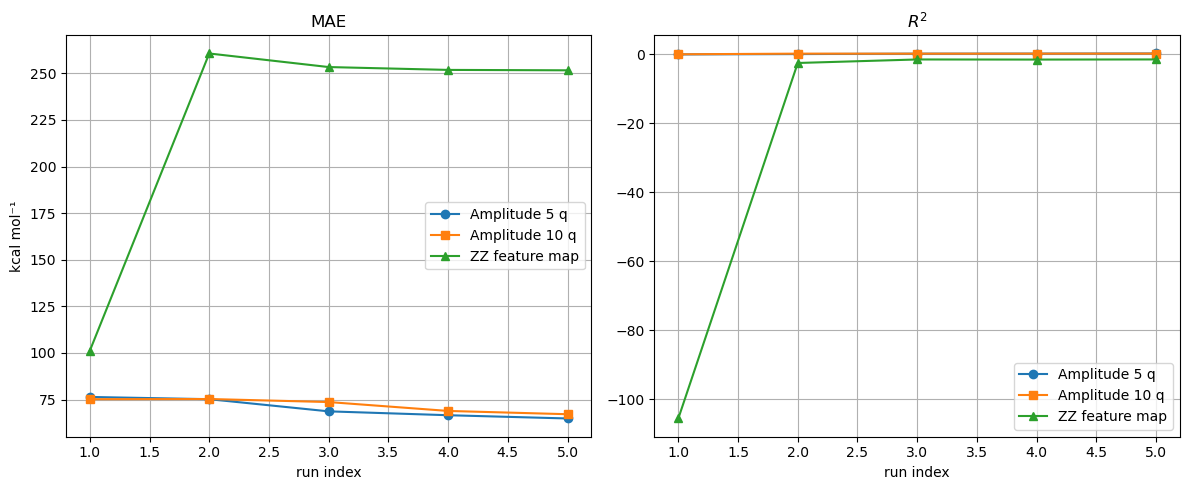

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# 1) raw data lists  


amp5_mae = [76.3997, 75.1985, 68.6744, 66.5982, 64.8537]      # 5-qubit amplitude
amp5_r2  = [-0.0945, 0.00987, 0.1189, 0.1386, 0.176]

amp10_mae = [75.1985,75.2953, 73.6612, 68.8955, 67.1375 ]     # 10-qubit amplitude
amp10_r2  = [-0.0588, 0.1287, 0.1169, 0.1284, 0.1446]

zz_mae = [101.1362, 260.6564, 253.3741, 251.8462, 251.6284]  # ZZ feature map
zz_r2  = [-105.5149, -2.5743, -1.5563, -1.5877, -1.5482 ]

# ----------------------------------------------
# 2) plotting
# ----------------------------------------------
x = np.arange(1, 6)  

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MAE
ax[0].plot(x, amp5_mae,  'o-', label='Amplitude 5 q')
ax[0].plot(x, amp10_mae, 's-', label='Amplitude 10 q')
ax[0].plot(x, zz_mae,    '^-', label='ZZ feature map')
ax[0].set_title('MAE'); ax[0].set_xlabel('run index'); ax[0].set_ylabel('kcal mol⁻¹')
ax[0].grid(True); ax[0].legend()

# R²
ax[1].plot(x, amp5_r2,  'o-', label='Amplitude 5 q')
ax[1].plot(x, amp10_r2, 's-', label='Amplitude 10 q')
ax[1].plot(x, zz_r2,    '^-', label='ZZ feature map')
ax[1].set_title('$R^{2}$'); ax[1].set_xlabel('run index'); ax[1].set_ylabel('')
ax[1].grid(True); ax[1].legend()

plt.tight_layout()
plt.show()
